In [72]:
# Load in all the available data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in the data
df = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')
df = df.set_index("Date")
df

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),...,Lag_1_day,Lag_2_days,Lag_3_days,Lag_4_days,Lag_5_days,Lag_6_days,Lag_7_days,Day_of_week,Month,Rolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-08,26.83,17.54,5.21,3.74,98.605,189.718,48.467,354.178,256.892,52.178,...,32.58,36.26,20.35,32.16,35.03,33.82,18.19,6,1,31.00
2012-01-09,47.91,13.04,4.24,3.80,98.605,344.154,49.054,382.756,282.438,60.752,...,26.83,32.58,36.26,20.35,32.16,35.03,33.82,0,1,33.02
2012-01-10,45.77,28.71,4.30,4.81,98.605,360.126,51.143,334.267,267.311,62.106,...,47.91,26.83,32.58,36.26,20.35,32.16,35.03,1,1,34.55
2012-01-11,47.83,21.58,4.08,5.14,98.605,360.330,50.693,385.000,277.343,60.862,...,45.77,47.91,26.83,32.58,36.26,20.35,32.16,2,1,36.79
2012-01-12,43.10,25.12,6.77,4.98,98.605,306.521,50.732,332.985,266.820,56.922,...,47.83,45.77,47.91,26.83,32.58,36.26,20.35,3,1,40.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,66.61,225.04,3.47,17.54,110.007,43.469,85.857,199.246,194.291,54.026,...,79.62,88.75,58.45,59.32,86.47,90.75,76.79,2,7,75.71
2024-07-25,78.34,272.71,2.12,17.85,110.410,50.676,82.632,195.983,209.610,52.963,...,66.61,79.62,88.75,58.45,59.32,86.47,90.75,3,7,73.94
2024-07-26,93.04,172.33,2.60,19.09,110.852,42.333,79.531,205.273,205.773,52.616,...,78.34,66.61,79.62,88.75,58.45,59.32,86.47,4,7,74.88


In [73]:
df.columns

Index(['Day_ahead_price (€/MWh)', 'Solar_radiation (W/m2)', 'Wind_speed (m/s)',
       'Temperature (°C)', 'Biomass (GWh)', 'Hard_coal (GWh)', 'Hydro (GWh)',
       'Lignite (GWh)', 'Natural_gas (GWh)', 'Other (GWh)',
       'Pumped_storage_generation (GWh)', 'Solar_energy (GWh)',
       'Wind_offshore (GWh)', 'Wind_onshore (GWh)',
       'Net_total_export_import (GWh)', 'BEV_vehicles', 'Oil_price (EUR)',
       'TTF_gas_price (€/MWh)', 'Nuclear_energy (GWh)', 'Lag_1_day',
       'Lag_2_days', 'Lag_3_days', 'Lag_4_days', 'Lag_5_days', 'Lag_6_days',
       'Lag_7_days', 'Day_of_week', 'Month', 'Rolling_mean_7'],
      dtype='object')

In [74]:
# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)
df

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),Pumped_storage_generation (GWh),Solar_energy (GWh),Wind_offshore (GWh),Wind_onshore (GWh),Net_total_export_import (GWh),BEV_vehicles,Oil_price (EUR),TTF_gas_price (€/MWh),Nuclear_energy (GWh)
Date,,,,,,,,,,,,,,,,,,,
2012-01-08,26.83,17.54,5.21,3.74,98.605,189.718,48.467,354.178,256.892,52.178,16.006,8.039,3.639,251.722,26.066,6,103.71,21.33,286.206
2012-01-09,47.91,13.04,4.24,3.80,98.605,344.154,49.054,382.756,282.438,60.752,25.507,4.942,2.225,153.948,-59.712,6,103.64,22.45,294.593
2012-01-10,45.77,28.71,4.30,4.81,98.605,360.126,51.143,334.267,267.311,62.106,18.835,17.101,2.892,200.075,-31.384,6,104.22,21.95,293.534
2012-01-11,47.83,21.58,4.08,5.14,98.605,360.330,50.693,385.000,277.343,60.862,18.164,10.254,3.059,211.599,-2.110,6,103.93,21.95,295.340
2012-01-12,43.10,25.12,6.77,4.98,98.605,306.521,50.732,332.985,266.820,56.922,19.129,17.576,6.901,477.412,32.997,6,102.26,22.08,294.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,66.61,225.04,3.47,17.54,110.007,43.469,85.857,199.246,194.291,54.026,20.934,325.285,49.360,179.921,-168.705,992,75.75,32.63,0.000
2024-07-25,78.34,272.71,2.12,17.85,110.410,50.676,82.632,195.983,209.610,52.963,18.766,394.116,51.053,42.885,-194.496,992,76.36,31.70,0.000
2024-07-26,93.04,172.33,2.60,19.09,110.852,42.333,79.531,205.273,205.773,52.616,19.081,256.246,40.449,129.267,-241.786,993,75.21,32.20,0.000


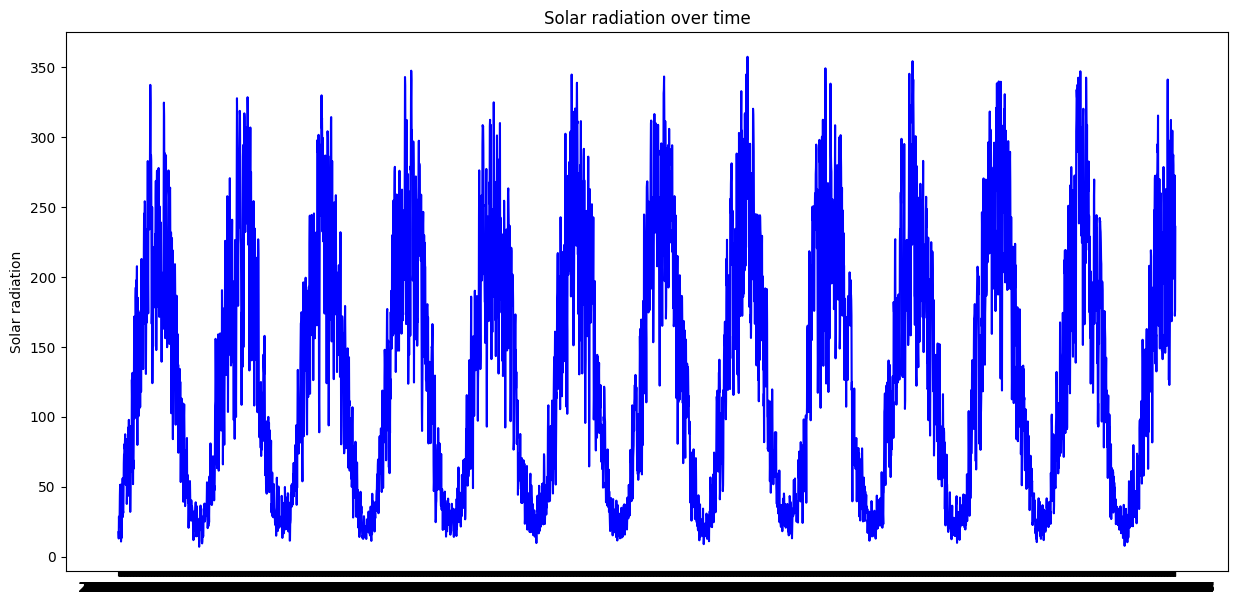

In [75]:
# print the solar_radiation over time
plt.figure(figsize=(15, 7))
plt.plot(df['Solar_radiation (W/m2)'], color='blue')
plt.title('Solar radiation over time')
plt.ylabel('Solar radiation')
plt.show()

In [76]:
import matplotlib.pyplot as plt

# Assume df and future_df are defined as in the previous code
# Append future_df to df to get a combined DataFrame for plotting
combined_df = pd.concat(
    [df[['Date', 'Solar_radiation (W/m2)']], future_df], ignore_index=True)

# Plot the original and future data
plt.figure(figsize=(14, 6))
plt.plot(combined_df['Date'], combined_df['Solar_radiation (W/m2)'],
         label='Solar_radiation (W/m2)', color='blue', linewidth=1)

# Highlight the original and future periods for clarity
original_end_date = df['Date'].max()
plt.axvline(x=original_end_date, color='red', linestyle='--',
            linewidth=1, label='End of Original Data')

# Formatting the plot
plt.title("Solar Radiation Over Time (with Future Values)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Solar Radiation", fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

KeyError: "['Date'] not in index"

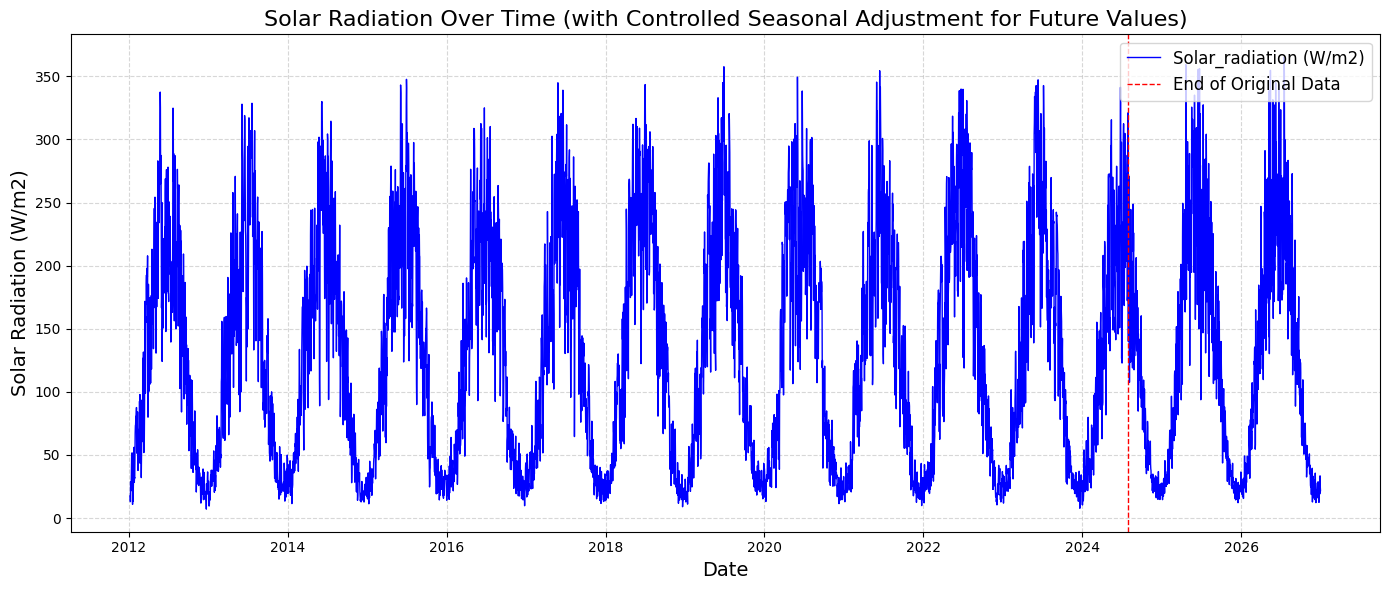

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import os
from chronos import ChronosPipeline
import platform

# Global configuration
TARGET_COLUMN = "Solar_radiation (W/m2)"
TOTAL_PREDICTION_LENGTH = 730

# Load and prepare data


def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df.sort_values('Date', inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Calculate mean solar radiation per day with monthly seasonality


def calculate_daily_means_with_seasonality(df):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        TARGET_COLUMN].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Solar_Radiation'] = daily_means[TARGET_COLUMN] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability


def generate_future_data(daily_means, start_date, end_date):
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Solar_Radiation']], on=[
                                'Month', 'Day'], how='left')

    # Add small random noise to future data
    noise_level = 0.2  # 5% of the value
    future_df['Solar_radiation'] = future_df['Adjusted_Solar_Radiation'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))

    return future_df[['Date', 'Solar_radiation']]

# Plot the data


def plot_data(original_df, future_df):
    # Ensure future data column matches TARGET_COLUMN
    future_df.rename(columns={'Solar_radiation': TARGET_COLUMN}, inplace=True)

    # Combine the original and future datasets
    combined_df = pd.concat(
        [original_df[['Date', TARGET_COLUMN]], future_df], ignore_index=True)

    # Plot combined data
    plt.figure(figsize=(14, 6))
    plt.plot(combined_df['Date'], combined_df[TARGET_COLUMN],
             label=TARGET_COLUMN, color='blue', linewidth=1)
    original_end_date = original_df['Date'].max()
    plt.axvline(x=original_end_date, color='red', linestyle='--',
                linewidth=1, label='End of Original Data')

    plt.title(
        "Solar Radiation Over Time (with Controlled Seasonal Adjustment for Future Values)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Solar Radiation (W/m2)", fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Load the original data
# Replace with your actual path
df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Calculate daily means with seasonality
daily_means = calculate_daily_means_with_seasonality(df)

# Generate future data with minimal variability
future_df = generate_future_data(
    daily_means, start_date='2024-07-29', end_date='2026-12-31')

# Plot the combined data
plot_data(df, future_df)

In [66]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import os

# Global configuration
TARGET_COLUMN = "Solar_radiation (W/m2)"
TOTAL_PREDICTION_LENGTH = 730

# Load and prepare data


def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df.sort_values('Date', inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Calculate mean solar radiation per day with monthly seasonality


def calculate_daily_means_with_seasonality(df):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        TARGET_COLUMN].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Solar_Radiation'] = daily_means[TARGET_COLUMN] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability and a fixed random seed


def generate_future_data(daily_means, start_date, end_date, seed=42):
    # Set seed for reproducibility
    np.random.seed(seed)

    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Solar_Radiation']], on=[
                                'Month', 'Day'], how='left')

    # Add small random noise to future data
    noise_level = 0.2  # 20% of the value
    future_df['Solar_radiation'] = future_df['Adjusted_Solar_Radiation'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))

    return future_df[['Date', 'Solar_radiation']]

# Plot the data


def plot_data(original_df, future_df):
    # Ensure future data column matches TARGET_COLUMN
    future_df.rename(columns={'Solar_radiation': TARGET_COLUMN}, inplace=True)

    # Combine the original and future datasets
    combined_df = pd.concat(
        [original_df[['Date', TARGET_COLUMN]], future_df], ignore_index=True)

    # Create the Plotly plot
    fig = go.Figure()

    # Add original data
    fig.add_trace(go.Scatter(
        x=combined_df['Date'], y=combined_df[TARGET_COLUMN],
        mode='lines', name=TARGET_COLUMN,
        line=dict(color='blue', width=1)
    ))

    # Add vertical line indicating the end of the original data
    original_end_date = original_df['Date'].max()
    fig.add_vline(x=original_end_date, line=dict(
        color='red', dash='dash'), name='End of Original Data')

    # Update layout
    fig.update_layout(
        title="Solar Radiation Over Time (with Controlled Seasonal Adjustment for Future Values)",
        xaxis_title="Date",
        yaxis_title="Solar Radiation (W/m2)",
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
        template='plotly_white'
    )

    fig.show()


# Load the original data
# Replace with your actual path
df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Calculate daily means with seasonality
daily_means = calculate_daily_means_with_seasonality(df)

# Generate future data with minimal variability
future_df = generate_future_data(
    daily_means, start_date='2024-07-29', end_date='2026-12-31')

# Plot the combined data
plot_data(df, future_df)

## New part

In [161]:
# Load and prepare data
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    df.sort_values('Date', inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    return df


df = load_and_prepare_data(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_july.csv')

# Drop the last 10 columns
df = df.drop(df.columns[-10:], axis=1)

df.columns

Index(['Date', 'Day_ahead_price (€/MWh)', 'Solar_radiation (W/m2)',
       'Wind_speed (m/s)', 'Temperature (°C)', 'Biomass (GWh)',
       'Hard_coal (GWh)', 'Hydro (GWh)', 'Lignite (GWh)', 'Natural_gas (GWh)',
       'Other (GWh)', 'Pumped_storage_generation (GWh)', 'Solar_energy (GWh)',
       'Wind_offshore (GWh)', 'Wind_onshore (GWh)',
       'Net_total_export_import (GWh)', 'BEV_vehicles', 'Oil_price (EUR)',
       'TTF_gas_price (€/MWh)', 'Nuclear_energy (GWh)'],
      dtype='object')

In [163]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import os

TARGET_COLUMNS = ["Natural_gas (GWh)"]

# Calculate mean solar radiation per day with monthly seasonality
# reduce the size of df start at the year 2018 first of january
# df_filtered = df[df['Date'] >= '2019-01-01']
# df = df_filtered.copy()


def calculate_daily_means_with_seasonality(df, target_column):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    daily_means = df.groupby(['Month', 'Day'])[
        target_column].mean().reset_index()

    # Add sinusoidal seasonal variation based on month
    daily_means['Seasonal_Adjustment'] = np.sin(
        2 * np.pi * (daily_means['Month'] - 1) / 12) * 0.1
    daily_means['Adjusted_Value'] = daily_means[target_column] * \
        (1 + daily_means['Seasonal_Adjustment'])
    return daily_means

# Generate future data with minimal variability


def generate_future_data(daily_means, start_date, end_date, seed=42, noise_level=0.2):
    np.random.seed(seed)
    future_dates = pd.date_range(start=start_date, end=end_date)
    future_df = pd.DataFrame({'Date': future_dates})
    future_df['Month'] = future_df['Date'].dt.month
    future_df['Day'] = future_df['Date'].dt.day

    # Merge future dates with daily means
    future_df = future_df.merge(daily_means[['Month', 'Day', 'Adjusted_Value']], on=[
                                'Month', 'Day'], how='left')

    future_df['Forecast'] = future_df['Adjusted_Value'] * \
        (1 + np.random.normal(0, noise_level, size=len(future_df)))

    return future_df[['Date', 'Forecast']]

# Plot the data for each target column separately and save the plot


def plot_and_save_data(original_df, future_dfs, target_columns, output_dir="forecasted_plots"):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        future_df = future_dfs[i]

        # Ensure future data column matches TARGET_COLUMN
        future_df.rename(columns={'Forecast': target_column}, inplace=True)

        # Combine the original and future datasets
        combined_df = pd.concat([original_df[['Date', target_column]], future_df[[
                                'Date', target_column]]], ignore_index=True)

        # Plot historical and forecast data for the current column
        fig = go.Figure()

        # Plot historical data
        fig.add_trace(go.Scatter(
            x=original_df['Date'],
            y=original_df[target_column],
            mode='lines',
            name=f"{target_column} (Historical)",
            line=dict(color='blue', width=1)
        ))

        # Plot future data
        fig.add_trace(go.Scatter(
            x=future_df['Date'],
            y=future_df[target_column],
            mode='lines',
            name=f"{target_column} (Forecast)",
            line=dict(color='darkred', width=1)
        ))

        # Add vertical line indicating the end of the original data
        original_end_date = original_df['Date'].max()
        fig.add_vline(x=original_end_date, line=dict(
            color='darkgreen', dash='dash'), name='End of Original Data')

        # Update layout for each plot
        fig.update_layout(
            title=f"{target_column} Over Time (Historical and Forecast)",
            xaxis_title="Date",
            yaxis_title=target_column,
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
            template='plotly'
        )

        # Save the figure as a PNG file
        plot_filename = os.path.join(
            output_dir, f"{target_column.replace(' ', '_').replace('/', '_')}_forecast_plot.png")
        fig.write_image(plot_filename)
        fig.show()
        print(f"Saved plot for {target_column} to {plot_filename}")

# Save the forecasted future data for each target column into separate CSV files


def save_forecast_to_csv(future_dfs, target_columns, output_dir="forecasted_data"):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, target_column in enumerate(target_columns):
        # Prepare the filename and full path
        file_name = f"{target_column.replace(' ', '_').replace('/', '_')}_forecast.csv"
        file_path = os.path.join(output_dir, file_name)

        # Save the future dataframe for the target column to CSV
        future_df = future_dfs[i]
        future_df.rename(columns={'Forecast': target_column}, inplace=True)
        future_df.to_csv(file_path, index=False)

        print(f"Saved forecasted data for {target_column} to {file_path}")


# Global configuration
NOISE_LEVEL = 0.25
TOTAL_PREDICTION_LENGTH = 730

# Generate daily means with seasonality and future data for each column
future_dfs = []
for target_column in TARGET_COLUMNS:
    daily_means = calculate_daily_means_with_seasonality(df, target_column)
    future_df = generate_future_data(
        daily_means, start_date='2024-07-29', end_date='2026-12-31', seed=42, noise_level=NOISE_LEVEL)
    future_dfs.append(future_df)

# Save forecasted data to CSV files
save_forecast_to_csv(future_dfs, TARGET_COLUMNS)

# Plot the combined data for each target column and save the plot
plot_and_save_data(df, future_dfs, TARGET_COLUMNS)

Saved forecasted data for Natural_gas (GWh) to forecasted_data/Natural_gas_(GWh)_forecast.csv


Saved plot for Natural_gas (GWh) to forecasted_plots/Natural_gas_(GWh)_forecast_plot.png
